In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

In [12]:
viajes = pd.read_csv('../data/recorridos-realizados-2019.csv')
viajes.head()

/home/pipe/Proyectos/sube_od/matrizOD_sube/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,4,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,0 days 00:07:02.000000000,2019-01-01 00:08:18,112.0,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,0 days 00:05:33.000000000,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:45.000000000,2019-01-01 00:29:00,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:34.000000000,2019-01-01 00:29:02,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,0 days 00:21:32.000000000,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo


In [15]:
viajes['id_estacion_origen'] = pd.to_numeric(viajes['id_estacion_origen'],errors='coerce')

In [16]:
viajes['id_estacion_destino'] = pd.to_numeric(viajes['id_estacion_destino'],errors='coerce')

In [3]:
estaciones = pd.read_csv('../data/estaciones-bicicletas.csv',)
estaciones.head()

,lat,long,nombre_estacion,id_estacion,capacidad,dirección_completa,direccion_nombre,direccion_altura,direccion_interseccion,barrio
0,-34.592423,-58.374715,002 - Retiro I,2,20,"Ramos Mejia, Jose Maria, Dr. Av. y Del Liberta...","Ramos Mejia, Jose Maria, Dr. Av.",NaN,Del Libertador Av.,Retiro
1,-34.611032,-58.368260,003 - ADUANA,3,20,Moreno y Paseo Colon Av.,Moreno,NaN,Paseo Colon Av.,Monserrat
2,-34.601726,-58.368763,004 - Plaza Roma,4,20,Lavalle y Bouchard,Lavalle,NaN,Bouchard,San Nicolas
3,-34.580550,-58.420954,005 - Plaza Italia,5,42,Sarmiento Av. 2601,Sarmiento Av.,2601.0,NaN,Palermo
4,-34.628526,-58.369758,006 - Parque Lezama,6,20,"Garcia, Martin Av. 295","Garcia, Martin Av.",295.0,NaN,San Telmo


In [17]:
viajes.loc[~viajes.id_estacion_origen.isin(estaciones.id_estacion),'id_estacion_origen'].unique()

array([ 16., 129., 142.,  nan, 160.,  34.,  35.,  18., 147.,  61., 139.,
         1., 123., 140., 157.,  97., 113., 145., 103., 136., 100., 109.,
       178.,  67.,  37., 133., 125.])

In [55]:
#obtenemos una tabla con cantidad de viajes por cada estacion de origen
viajesXestacion = viajes.reindex(columns = ['id_estacion_origen','id_estacion_destino'])\
                    .groupby(['id_estacion_origen','id_estacion_destino']).size().reset_index()
viajesXestacion = viajesXestacion.loc[viajesXestacion.id_estacion_origen != viajesXestacion.id_estacion_destino,:]
viajesXestacion.columns = ['id_estacion_origen','id_estacion_destino','n']
viajesXestacion.sort_values(by='n',ascending=False).head(3)



,id_estacion_origen,id_estacion_destino,n
131301,412.0,266.0,2722
87925,266.0,412.0,2471
88463,268.0,274.0,2371


In [56]:
viajesXestacion = viajesXestacion.merge(estaciones.reindex(columns = ['lat','long','nombre_estacion','id_estacion']),
                                       left_on = 'id_estacion_origen',
                                       right_on = 'id_estacion',
                                       how='inner')\
    .drop(['id_estacion','id_estacion_origen'],axis=1)\
    .rename(columns = {'lat':'lat_o','long':'lon_o'})


In [57]:
viajesXestacion = viajesXestacion.merge(estaciones.reindex(columns = ['lat','long','id_estacion']),
                                       left_on = 'id_estacion_destino',
                                       right_on = 'id_estacion',
                                       how='inner')\
    .drop('id_estacion_destino',axis=1)\
    .rename(columns = {'lat':'lat_d','long':'lon_d'})

In [58]:
viajesXestacion

,n,lat_o,lon_o,nombre_estacion,lat_d,lon_d,id_estacion
0,95,-34.592423,-58.374715,002 - Retiro I,-34.611032,-58.368260,3
1,507,-34.601726,-58.368763,004 - Plaza Roma,-34.611032,-58.368260,3
2,6,-34.580550,-58.420954,005 - Plaza Italia,-34.611032,-58.368260,3
3,197,-34.628526,-58.369758,006 - Parque Lezama,-34.611032,-58.368260,3
4,23,-34.606498,-58.381098,007 - OBELISCO,-34.611032,-58.368260,3
...,...,...,...,...,...,...,...
134671,24,-34.544597,-58.459554,227 -Club Ciudad de Buenos Aires,-34.587458,-58.473951,428
134672,10,-34.578297,-58.445030,253 - Plaza Colegiales,-34.587458,-58.473951,428
134673,5,-34.610012,-58.374919,016 - Legislatura,-34.587458,-58.473951,428
134674,1,-34.615753,-58.370618,081 -Balcarce,-34.587458,-58.473951,428


In [64]:
def crear_trayectoria_od(fila):
    return LineString([[fila.lon_o,fila.lat_o],[fila.lon_d,fila.lat_d]])

In [65]:
geometrias =  viajesXestacion.apply(crear_trayectoria_od,axis=1)

In [67]:
od = gpd.GeoDataFrame(viajesXestacion,
                          geometry  = geometrias,
                          crs='EPSG:4326')
od.head()

,n,lat_o,lon_o,nombre_estacion,lat_d,lon_d,id_estacion,geometry
0,95,-34.592423,-58.374715,002 - Retiro I,-34.611032,-58.36826,3,"LINESTRING (-58.37472 -34.59242, -58.36826 -34..."
1,507,-34.601726,-58.368763,004 - Plaza Roma,-34.611032,-58.36826,3,"LINESTRING (-58.36876 -34.60173, -58.36826 -34..."
2,6,-34.580550,-58.420954,005 - Plaza Italia,-34.611032,-58.36826,3,"LINESTRING (-58.42095 -34.58055, -58.36826 -34..."
3,197,-34.628526,-58.369758,006 - Parque Lezama,-34.611032,-58.36826,3,"LINESTRING (-58.36976 -34.62853, -58.36826 -34..."
4,23,-34.606498,-58.381098,007 - OBELISCO,-34.611032,-58.36826,3,"LINESTRING (-58.38110 -34.60650, -58.36826 -34..."


In [69]:


#importamos las librerias de visualizacion
import matplotlib.pyplot as plt
%matplotlib inline



In [75]:
od['n'].describe()

count    134676.000000
mean         41.917476
std          96.835460
min           1.000000
25%           4.000000
50%          11.000000
75%          37.000000
max        2722.000000
Name: n, dtype: float64

In [78]:
od.plot?

KeyboardInterrupt: 

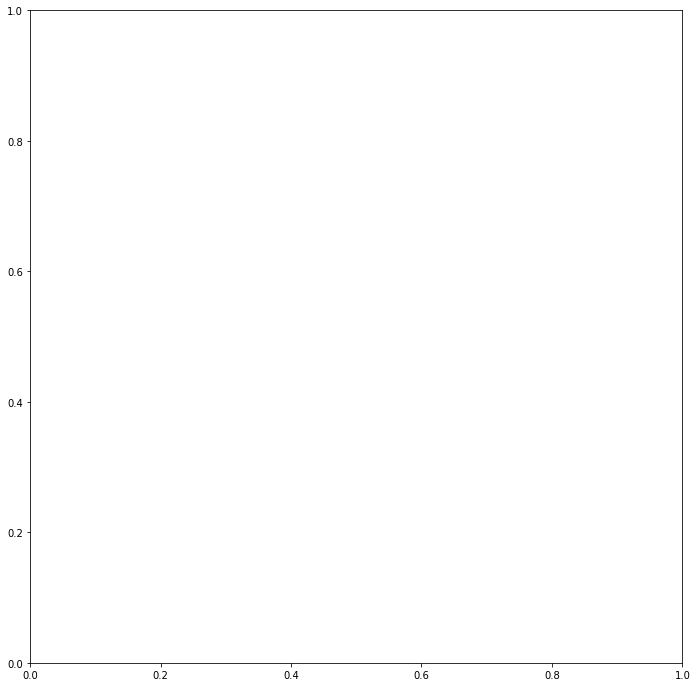

In [79]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

od.plot(
        ax=ax,
        column = od['n'],
        alpha=0.05,
        cmap='Blues',    
        scheme='FisherJenks') 
    
ax.set_axis_off()
ax.set_title('Viajes en Ecobici - 2019');

In [81]:
od.to_file('../data/od_ecobici.geojson',driver="GeoJSON")